# Decision trees

Decision trees are a supervised machine learning method for classification

+ Supervised - use labeled data for training
+ Classification - predict the category for a given input

To explore decision trees, we'll use the Python scikit-learn machine learning (sklearn) package and the famous iris dataset that was described in R.A. Fisher's classic 1936 paper “The Use of Multiple Measurements in Taxonomic Problems”. The goal is straightforward - given four measurements of a flower (sepal width, sepal length, petal width and petal length), predict which of three species (setosa, versicolor, virginica) the flower belongs to.

We'll dive right in first and then go back and examine the steps in more detail

Import the data set and sklearn tree package, load the data, create the decision tree classifier and train the classifier

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Import graphviz, create a DOT representation of the decision tree, render using Graphviz and display

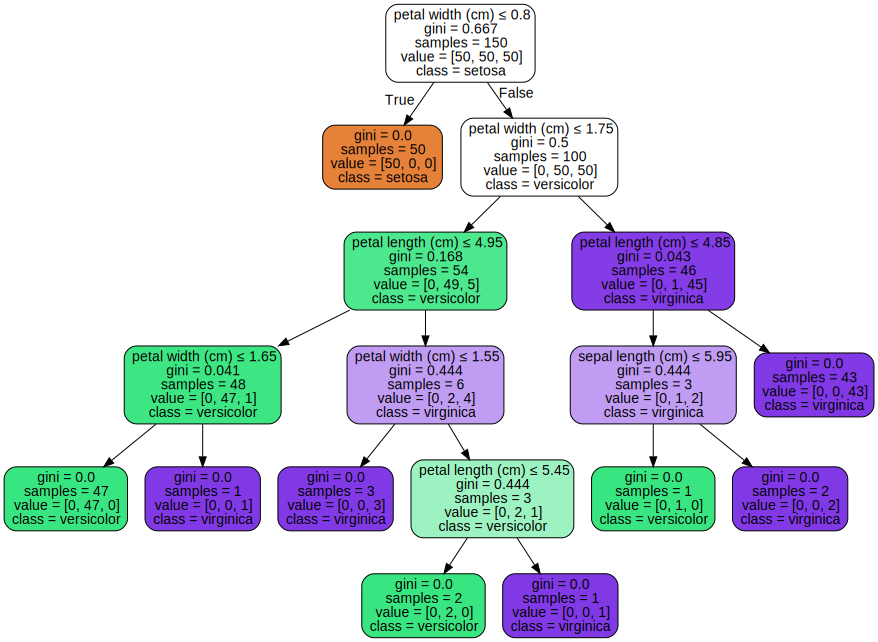

In [2]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We start by importing sklearn's tree module. Since the entire sklearn package is very large, we imported just the functionality we needed.

In [3]:
from sklearn import tree

We then import and load a data set. In this case, we used one of the data sets that is provided with sklearn, but more generally you may need to read in and process one or more files.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

Let's take a look at the type and content of iris.

In [5]:
type(iris)

sklearn.utils.Bunch

sklearn.utils.Bunch objects aggregate multiple arrays and strings. This is not necessary, but is a convenient way to package everything needed for a machine learning project. Let's now look into the contents of iris

In [6]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

We're primarily concerned with the data and target arrays. The data array contains the measurements (sepal length, sepal width, petal length and petal width), with one row for each sample. The target array contains the data lables (0 = setosa, 1 = versicolor, 3 = virginica).

In [7]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [8]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

The next two lines create a new classifier object and perform the fitting

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

At this point, we're done with the hard work. We've trained the decision tree and can use it to predict the class from  input data. Let's try it with a few flower measurements.

In [10]:
clf.predict([[ 5. ,  3.6,  1.4,  0.2],
             [ 5.9,  3. ,  5.1,  1.8],
             [ 6.7,  3. ,  5. ,  1.7]])

array([0, 2, 1])

In the above example, we see that the predicted classes for the three flowers are 0, 2, and 1. We can get a little more detail with the predict_proba method. For each row of input measurements, it gives the probability that item will belong to a given class.

In [11]:
clf.predict_proba([[ 5. ,  3.6,  1.4,  0.2],
                   [ 5.9,  3. ,  5.1,  1.8],
                   [ 6.7,  3. ,  5. ,  1.7]])

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

Sometimes we may want to inspect the decision tree. This is a two=step process. First we create a representation of the graph using the DOT language (http://www.graphviz.org/content/dot-language) and then we render an image of the graph using the graphviz Source method. To take a little of the mystery out of the process, we show a simple example below.

In [12]:
simple_dot_data = 'digraph Tree {\n0; \n1; \n2; 0 -> 1; 0 -> 2}'

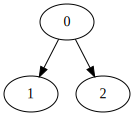

In [13]:
import graphviz
graph = graphviz.Source(simple_dot_data)  
graph 

Although we can generate the DOT description of a graph by hand, this is tedious and error prone for all but the simplest graphs. Fortunately, the sklearn tree module contains a method to automatically generate the graph from the classifier.

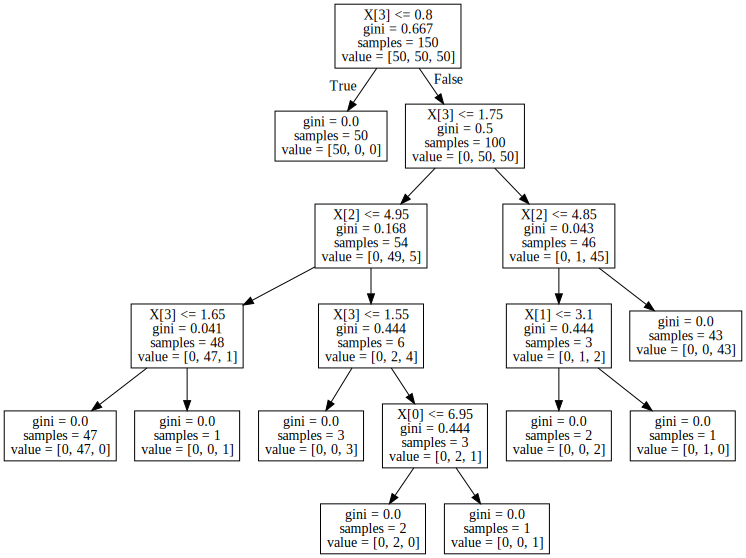

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)  
graph 

Although we only need to pass the classifier to the Source method, the resulting graph is much more useful if we label the features (sepal length, ...) and classes (setosa, ...)

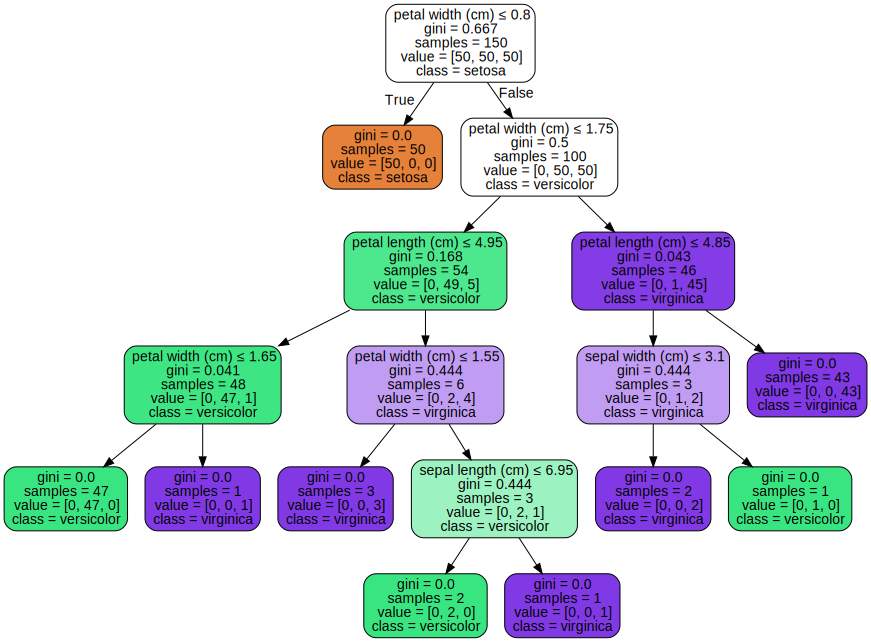

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

It's worth taking a quick look at the DOT representation for this more complex graph. Makes you fully appreciate that sklearn provides a method for generating this from the classifier.

In [16]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<petal width (cm) &le; 0.8<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]<br/>class = setosa>, fillcolor="#e5813900"] ;\n1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]<br/>class = setosa>, fillcolor="#e58139ff"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]<br/>class = versicolor>, fillcolor="#39e58100"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]<br/>class = versicolor>, fillcolor="#39e581e5"] ;\n2 -> 3 ;\n4 [label=<petal width (cm) &le; 1.65<br/>gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]<br/>class = versicolor>, fillcolor="#39e581fa"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 47<b